In [21]:
import scipy
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from itertools import combinations

def sum_kth_principal_minors(matrix, k):
    """Compute the sum of the k-th principal minors of a given matrix."""
    principal_minor_sum = 0
    
    # Get all combinations of row indices for k x k principal minors
    for indices in combinations(range(n), k):
        minor = matrix[indices, indices]  # Extract the k x k principal minor
        principal_minor_sum += minor.det()  # Add the determinant of the minor
    
    return principal_minor_sum

def run_function_with_constraints(func, constraints):
    """Given a function and some constraint functions attempt to minimize the function"""
    bounds = [(0.0, 1.0)] * n**2
    num_starts = 50
    results = []
    
    # Perform multiple minimizations with different initial guesses
    for _ in range(num_starts):
        initial_guess = np.random.rand(n**2)
        result = minimize(func, initial_guess, bounds=bounds, constraints=constraints)
        # result = minimize(func, initial_guess, bounds=bounds, constraints=constraints, method='trust-constr')
        results.append(result)
    
    # Find the best result (minimum value of f)
    return min(results, key=lambda x: x.fun)

def run_function_with_constraints_and_equal(func, constraints, eq_func, a):
    """Run run_function_with_constraints with the added constraint that eq_func is equal to a"""
    constraints_and_func_1 = constraints + ({'type': 'eq', 'fun': lambda x : (eq_func(x) - a)},)
    return run_function_with_constraints(func, constraints_and_func_1)

def run_function_with_constraints_and_double_equal(func, constraint, eq_func_1, a, eq_func_2, b):
    constraints_and_func_2 = constraint + ({'type': 'eq', 'fun': lambda x : (eq_func_1(x) - a)},) + ({'type': 'eq', 'fun': lambda x : (eq_func_2(x) - b)},)
    return run_function_with_constraints(func, constraints_and_func_2)

def run_function_with_constraints_and_triple_equal(func, constraint, eq_func_1, a, eq_func_2, b, eq_func_3, c):
    constraints_and_func_3 = constraint + ({'type': 'eq', 'fun': lambda x : (eq_func_1(x) - a)},) + ({'type': 'eq', 'fun': lambda x : (eq_func_2(x) - b)},) + ({'type': 'eq', 'fun': lambda x : (eq_func_3(x) - c)},)
    return run_function_with_constraints(func, constraints_and_func_3)

n = 4
symbols = sp.symbols('a_:'+str(n**2))
matrix = sp.Matrix(n,n, symbols)

m=0
for j in range(n):
    for k in range(j,n):
        m+=1
        matrix[j,k] = 'a_'+str(m)
        matrix[k,j] = 'a_'+str(m)

funcs_of_principal_minors = tuple(
    sp.lambdify([matrix[:]], sum_kth_principal_minors(matrix, k), 'numpy')
    for k in range(1, n+1)
)
funcs_of_principal_minors_flipped = tuple(
    sp.lambdify([matrix[:]], -1*sum_kth_principal_minors(matrix, k), 'numpy')
    for k in range(1, n+1)
)
matrix_constraints = tuple(
    {'type': 'eq', 'fun': sp.lambdify([matrix[:]], 1-sum(matrix.row(k)), 'numpy')} for k in range (0,n)
)

In [4]:
result_min = run_function_with_constraints(funcs_of_principal_minors[0], matrix_constraints)
result_max = run_function_with_constraints(funcs_of_principal_minors_flipped[0], matrix_constraints)

np.set_printoptions(precision=3)

print("Minimum value found:", result_min.fun)
print("Achieved at:", result_min.x)
print("Maximum value found:", -1*result_max.fun)
print("Achieved at:", result_max.x)

Minimum value found: 0.0
Achieved at: [0.    0.587 0.731 0.524 0.376 0.    0.528 0.682 0.222 0.402 0.    0.042
 0.402 0.222 0.376 0.   ]
Maximum value found: 4.0
Achieved at: [1.000e+00 4.882e-01 3.148e-01 1.434e-01 1.665e-16 1.000e+00 4.616e-01
 2.075e-01 2.220e-16 0.000e+00 1.000e+00 2.728e-01 0.000e+00 0.000e+00
 1.110e-16 1.000e+00]


In [19]:
result_min = run_function_with_constraints_and_double_equal(funcs_of_principal_minors[2], 
                                                        matrix_constraints, 
                                                        funcs_of_principal_minors[0], 
                                                        1,
                                                        funcs_of_principal_minors[1],
                                                        -3/4)
result_max = run_function_with_constraints_and_double_equal(funcs_of_principal_minors_flipped[2], 
                                                        matrix_constraints, 
                                                        funcs_of_principal_minors_flipped[0], 
                                                        1,
                                                        funcs_of_principal_minors_flipped[1],
                                                        -3/4)

np.set_printoptions(precision=3)

print("Minimum value found:", result_min.fun)
print("Achieved at:", result_min.x)
print("Maximum value found:", -1*result_max.fun)
print("Achieved at:", result_max.x)

Minimum value found: -0.48214593194482513
Achieved at: [3.500e-01 7.584e-01 5.546e-01 7.335e-01 1.957e-07 1.344e-07 3.107e-01
 3.058e-01 1.928e-01 8.072e-01 4.011e-08 4.466e-01 4.572e-01 1.928e-01
 4.219e-07 3.500e-01]
Maximum value found: 0.39991887196136844
Achieved at: [-0.213  0.5    0.5    0.5    0.298 -0.213  0.5    0.5    0.298  0.298
 -0.213  0.5    0.298  0.298  0.298 -0.213]


In [25]:
result_min = run_function_with_constraints_and_triple_equal(funcs_of_principal_minors[3], 
                                                        matrix_constraints, 
                                                        funcs_of_principal_minors[0], 
                                                        1,
                                                        funcs_of_principal_minors[1],
                                                        -3/4,
                                                        funcs_of_principal_minors[2],
                                                        -1)
result_max = run_function_with_constraints_and_triple_equal(funcs_of_principal_minors_flipped[3], 
                                                        matrix_constraints, 
                                                        funcs_of_principal_minors_flipped[0], 
                                                        1,
                                                        funcs_of_principal_minors_flipped[1],
                                                        -3/4,
                                                        funcs_of_principal_minors[2],
                                                        -1)

np.set_printoptions(precision=3)

print("Minimum value found:", result_min.fun)
print("Achieved at:", result_min.x)
print("Maximum value found:", -1*result_max.fun)
print("Achieved at:", result_max.x)

Minimum value found: -1.6822614251693218
Achieved at: [0.    0.29  0.498 0.274 0.394 0.905 0.643 0.84  1.    0.11  1.    0.339
 0.963 0.022 0.009 0.907]
Maximum value found: 0.5645359276048644
Achieved at: [1.000e+00 6.966e-01 4.125e-01 9.282e-01 4.902e-01 1.666e-01 4.285e-01
 3.714e-01 4.828e-01 1.000e+00 2.183e-13 7.051e-01 6.929e-01 7.850e-01
 1.000e+00 4.214e-01]


In [24]:
x_values = np.linspace(-1, 0, 20)

# Calculate corresponding y values
min_y_values = [run_function_with_constraints_and_double_equal(funcs_of_principal_minors[2], 
                                                        matrix_constraints, 
                                                        funcs_of_principal_minors[0], 
                                                        1,
                                                        funcs_of_principal_minors[1],
                                                        x).fun for x in x_values]
max_y_values = [-1*run_function_with_constraints_and_double_equal(funcs_of_principal_minors_flipped[2], 
                                                           matrix_constraints, 
                                                           funcs_of_principal_minors[0], 
                                                           1,
                                                           funcs_of_principal_minors[1],
                                                           x).fun for x in x_values]

# Plot the function
plt.figure(figsize=(20, 16))
plt.fill_between(x_values, min_y_values, max_y_values, interpolate=True, label='E_1 dependence on E_2', color='C0')

plt.title('Plot of E_1 dependence on E_2')
plt.xlabel('E_1')
plt.ylabel('E_2')
plt.grid(True)
plt.savefig('test.png', bbox_inches='tight')

KeyboardInterrupt: 

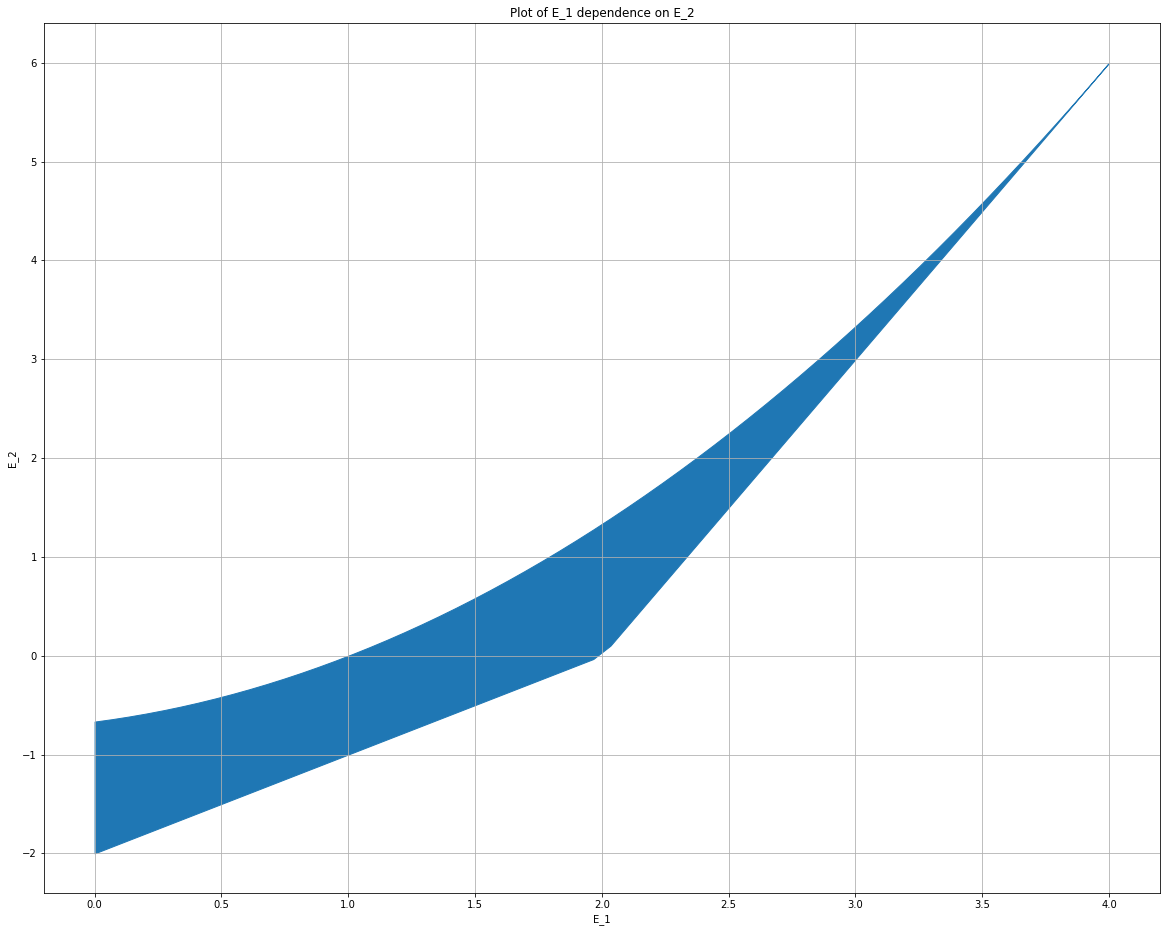

In [2]:
x_values = np.linspace(0, n, 60)

# Calculate corresponding y values
min_y_values = [run_function_with_constraints_and_equal(funcs_of_principal_minors[1], 
                                                        matrix_constraints, 
                                                        funcs_of_principal_minors[0], 
                                                        x).fun for x in x_values]
max_y_values = [-1*run_function_with_constraints_and_equal(funcs_of_principal_minors_flipped[1], 
                                                           matrix_constraints, 
                                                           funcs_of_principal_minors[0], 
                                                           x).fun for x in x_values]

# Plot the function
plt.figure(figsize=(20, 16))
plt.fill_between(x_values, min_y_values, max_y_values, interpolate=True, label='E_1 dependence on E_2', color='C0')

plt.title('Plot of E_1 dependence on E_2')
plt.xlabel('E_1')
plt.ylabel('E_2')
plt.grid(True)
plt.savefig('test.png', bbox_inches='tight')

           6             5             4             3            2
1.464e-06 x - 2.479e-06 x + 1.511e-06 x - 3.991e-07 x + 4.49e-08 x + 1 x - 2
R-Value: 1.0


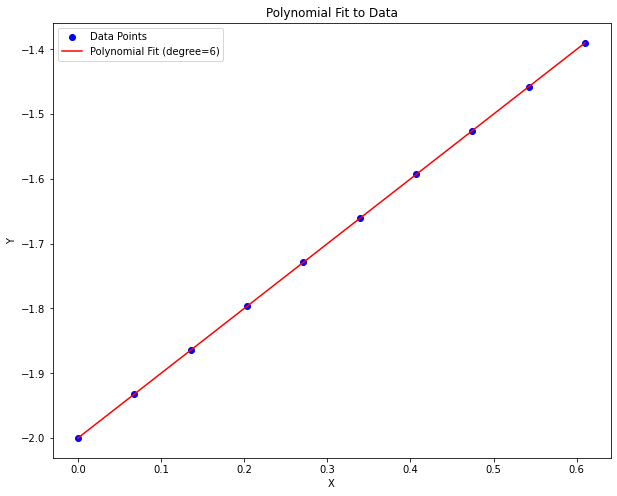

In [3]:
x = x_values[0:10]
y = min_y_values[0:10]


# Fit a polynomial of degree n (change n as needed)
degree = 6
coefficients = np.polyfit(x, y, degree)

# Generate a polynomial function from the coefficients
poly_func = np.poly1d(coefficients)
print(poly_func)

# Calculate R-squared
y_pred = poly_func(x)
residuals = y - y_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

print("R-Value:", r_squared)

# Generate values for plotting the fitted polynomial
x_fit = np.linspace(min(x), max(x), 100)
y_fit = poly_func(x_fit)

# Plotting the data points and the fitted polynomial
plt.close()
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_fit, y_fit, color='red', label=f'Polynomial Fit (degree={degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Fit to Data')
plt.legend()
plt.show()